In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/email-spam-classification-dataset-csv/emails.csv


# 1. Importing Dataset and Data Cleaning

In [2]:
df = pd.read_csv('/kaggle/input/email-spam-classification-dataset-csv/emails.csv')

In [3]:
df.shape

(5172, 3002)

In [4]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [6]:
df.duplicated().sum()

0

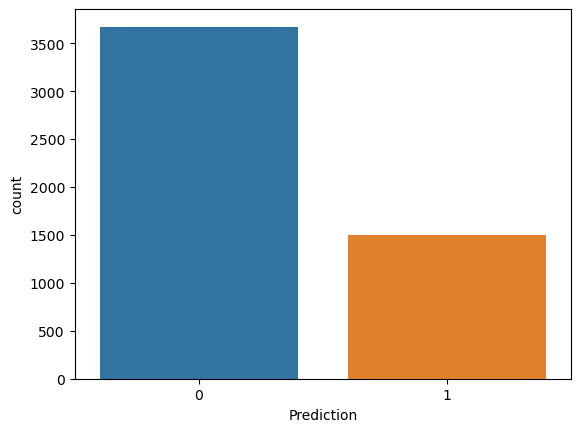

In [7]:
sns.countplot(data = df, x = "Prediction")
plt.show()

In [8]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


# 2. Training and Testing

In [9]:
x = df.iloc[:, 1:3001]
x

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [10]:
y = df.iloc[:, -1].values
y

array([0, 0, 0, ..., 1, 1, 0])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

# 3. Model Creation

## 3.a Multinomial Naive Bayes


In [12]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(train_x, train_y)

MultinomialNB()

In [13]:
mnb_y_pred = mnb.predict(x)
mnb_accuracy = accuracy_score(y, mnb_y_pred)
mnb_f1 = f1_score(y, mnb_y_pred)
mnb_recall = recall_score(y, mnb_y_pred)
mnb_roc_auc = roc_auc_score(y, mnb_y_pred)
    
print(f"Accuracy of MultinomialNB model: {mnb_accuracy * 100:.2f}%")
print(f"F1-score of MultinomialNB model: {mnb_f1:.2f}")
print(f"Recall of MultinomialNB model: {mnb_recall:.2f}")
print(f"ROC AUC of MultinomialNB model: {mnb_roc_auc:.2f}")

Accuracy of MultinomialNB model: 94.70%
F1-score of MultinomialNB model: 0.91
Recall of MultinomialNB model: 0.94
ROC AUC of MultinomialNB model: 0.95


## 3.b Gaussian Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x, train_y)

GaussianNB()

In [15]:
gnb_y_pred = gnb.predict(x)
gnb_accuracy = accuracy_score(y, gnb_y_pred)
gnb_f1 = f1_score(y, gnb_y_pred)
gnb_recall = recall_score(y, gnb_y_pred)
gnb_roc_auc = roc_auc_score(y, gnb_y_pred)
    
print(f"Accuracy of GaussianNB model: {gnb_accuracy * 100:.2f}%")
print(f"F1-score of GaussianNB model: {gnb_f1:.2f}")
print(f"Recall of GaussianNB model: {gnb_recall:.2f}")
print(f"ROC AUC of GaussianNB model: {gnb_roc_auc:.2f}")

Accuracy of GaussianNB model: 96.44%
F1-score of GaussianNB model: 0.94
Recall of GaussianNB model: 0.98
ROC AUC of GaussianNB model: 0.97


## 3.c Bernoulli Naive Bayes

In [16]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(train_x, train_y)

BernoulliNB()

In [17]:
bnb_y_pred = bnb.predict(x)
bnb_accuracy = accuracy_score(y, bnb_y_pred)
bnb_f1 = f1_score(y, bnb_y_pred)
bnb_recall = recall_score(y, bnb_y_pred)
bnb_roc_auc = roc_auc_score(y, bnb_y_pred)
    
print(f"Accuracy of BernoulliNB model: {bnb_accuracy * 100:.2f}%")
print(f"F1-score of BernoulliNB model: {bnb_f1:.2f}")
print(f"Recall of BernoulliNB model: {bnb_recall:.2f}")
print(f"ROC AUC of BernoulliNB model: {bnb_roc_auc:.2f}")

Accuracy of BernoulliNB model: 86.70%
F1-score of BernoulliNB model: 0.76
Recall of BernoulliNB model: 0.73
ROC AUC of BernoulliNB model: 0.83


## 3.d Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=2000)
lr.fit(train_x, train_y)

LogisticRegression(max_iter=2000)

In [19]:
lr_y_pred = lr.predict(x)
lr_accuracy = accuracy_score(y, lr_y_pred)
lr_f1 = f1_score(y, lr_y_pred)
lr_recall = recall_score(y, lr_y_pred)
lr_roc_auc = roc_auc_score(y, lr_y_pred)
    
print(f"Accuracy of Logistic Regression model: {lr_accuracy * 100:.2f}%")
print(f"F1-score of Logistic Regression model: {lr_f1:.2f}")
print(f"Recall of Logistic Regression model: {lr_recall:.2f}")
print(f"ROC AUC of Logistic Regression model: {lr_roc_auc:.2f}")

Accuracy of Logistic Regression model: 99.42%
F1-score of Logistic Regression model: 0.99
Recall of Logistic Regression model: 0.99
ROC AUC of Logistic Regression model: 0.99


# 4. Models Comparision

In [20]:
accuracy = [mnb_accuracy, gnb_accuracy, bnb_accuracy, lr_accuracy]
f1_score = [mnb_f1, gnb_f1, bnb_f1, lr_f1]
recall = [mnb_recall, gnb_recall, bnb_recall, lr_recall]
roc_auc = [mnb_roc_auc, gnb_roc_auc, bnb_roc_auc, lr_roc_auc]

models = ["MultinomialNB", "GaussianNB", "BernoulliNB", "Logistic Regression"]

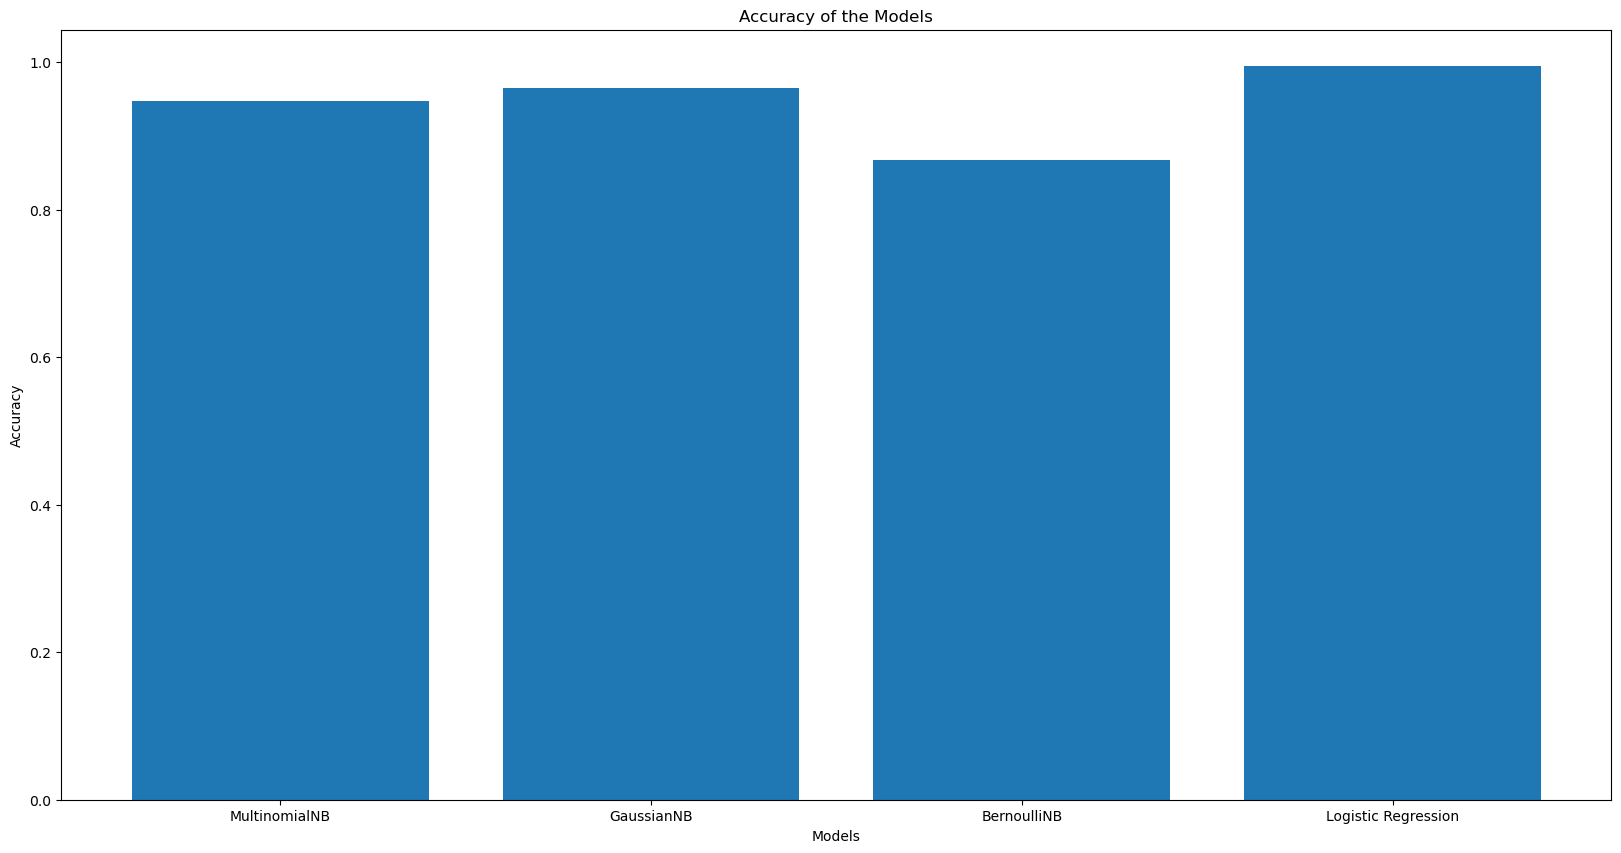

In [21]:
plt.figure(figsize = (20,10))
plt.bar(models, accuracy)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of the Models")
plt.show()

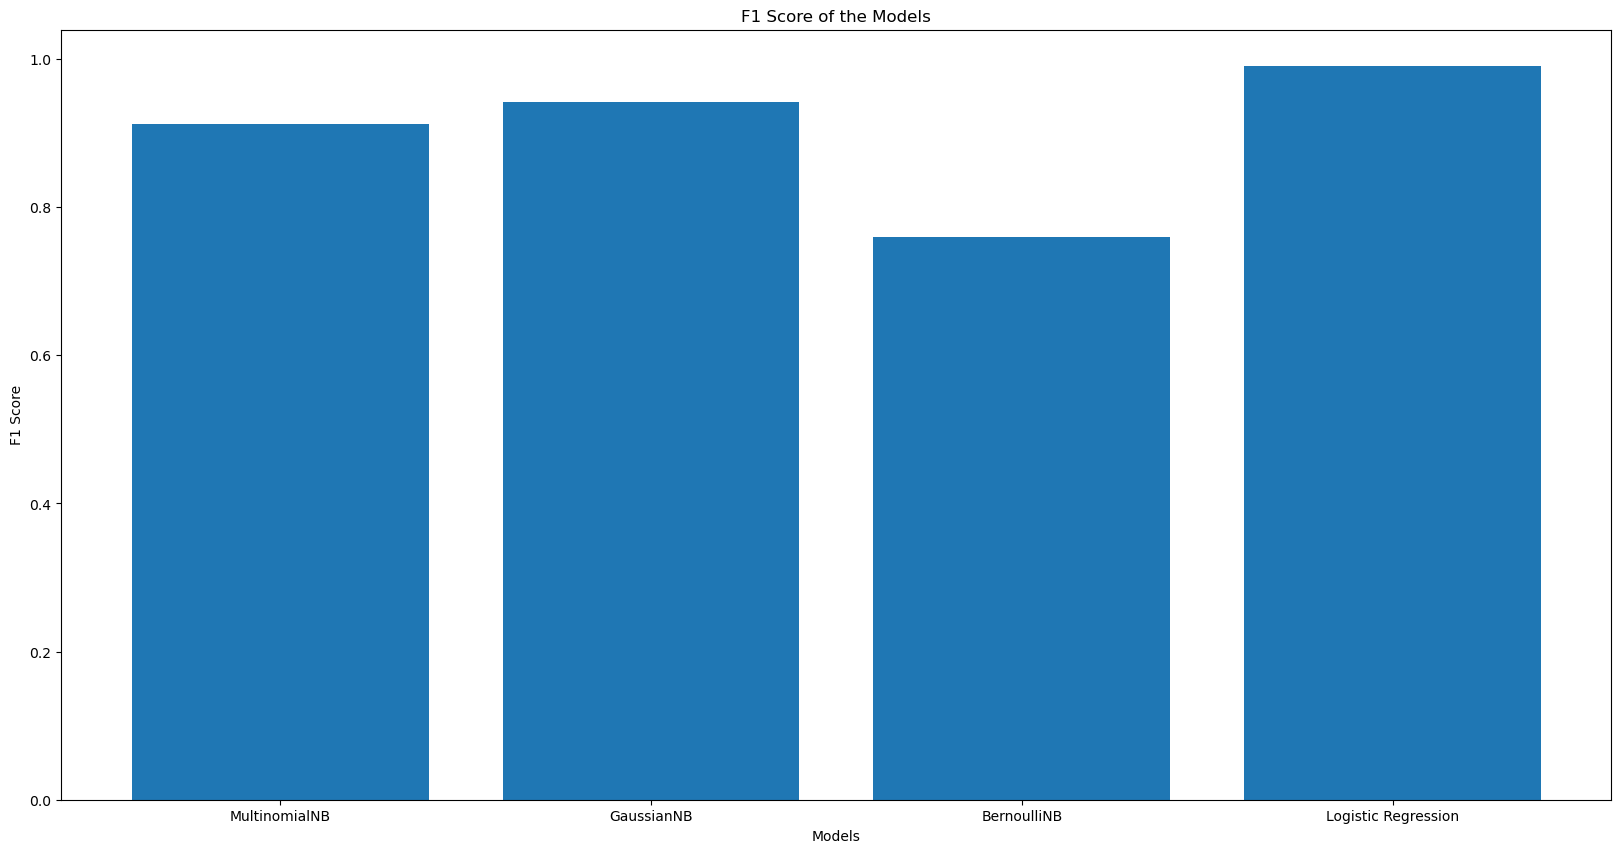

In [22]:
plt.figure(figsize = (20,10))
plt.bar(models, f1_score)
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("F1 Score of the Models")
plt.show()

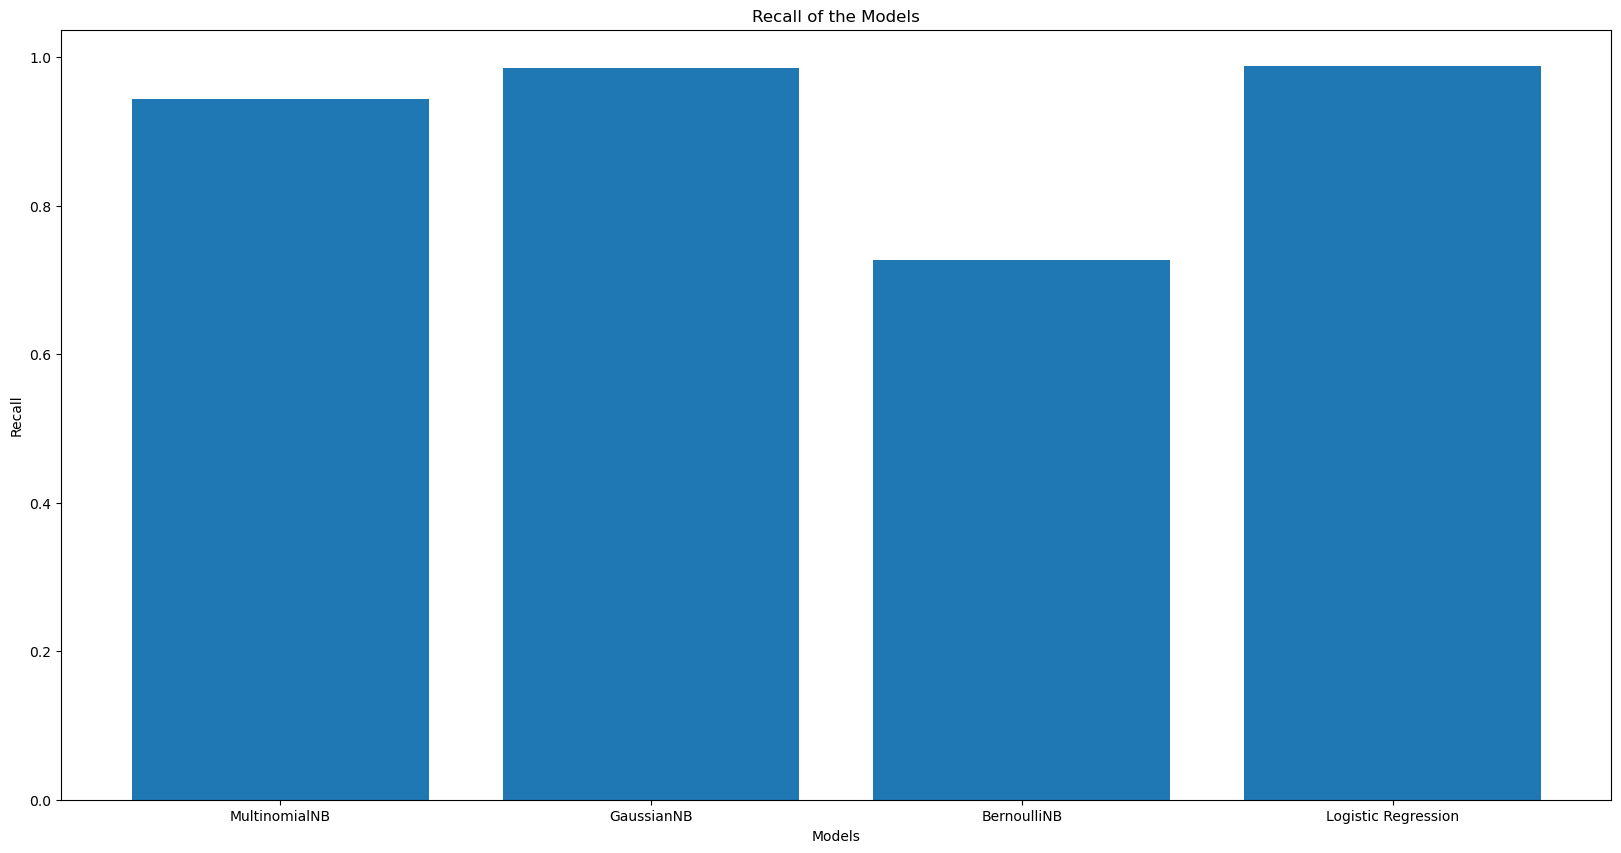

In [23]:
plt.figure(figsize = (20,10))
plt.bar(models, recall)
plt.xlabel("Models")
plt.ylabel("Recall")
plt.title("Recall of the Models")
plt.show()

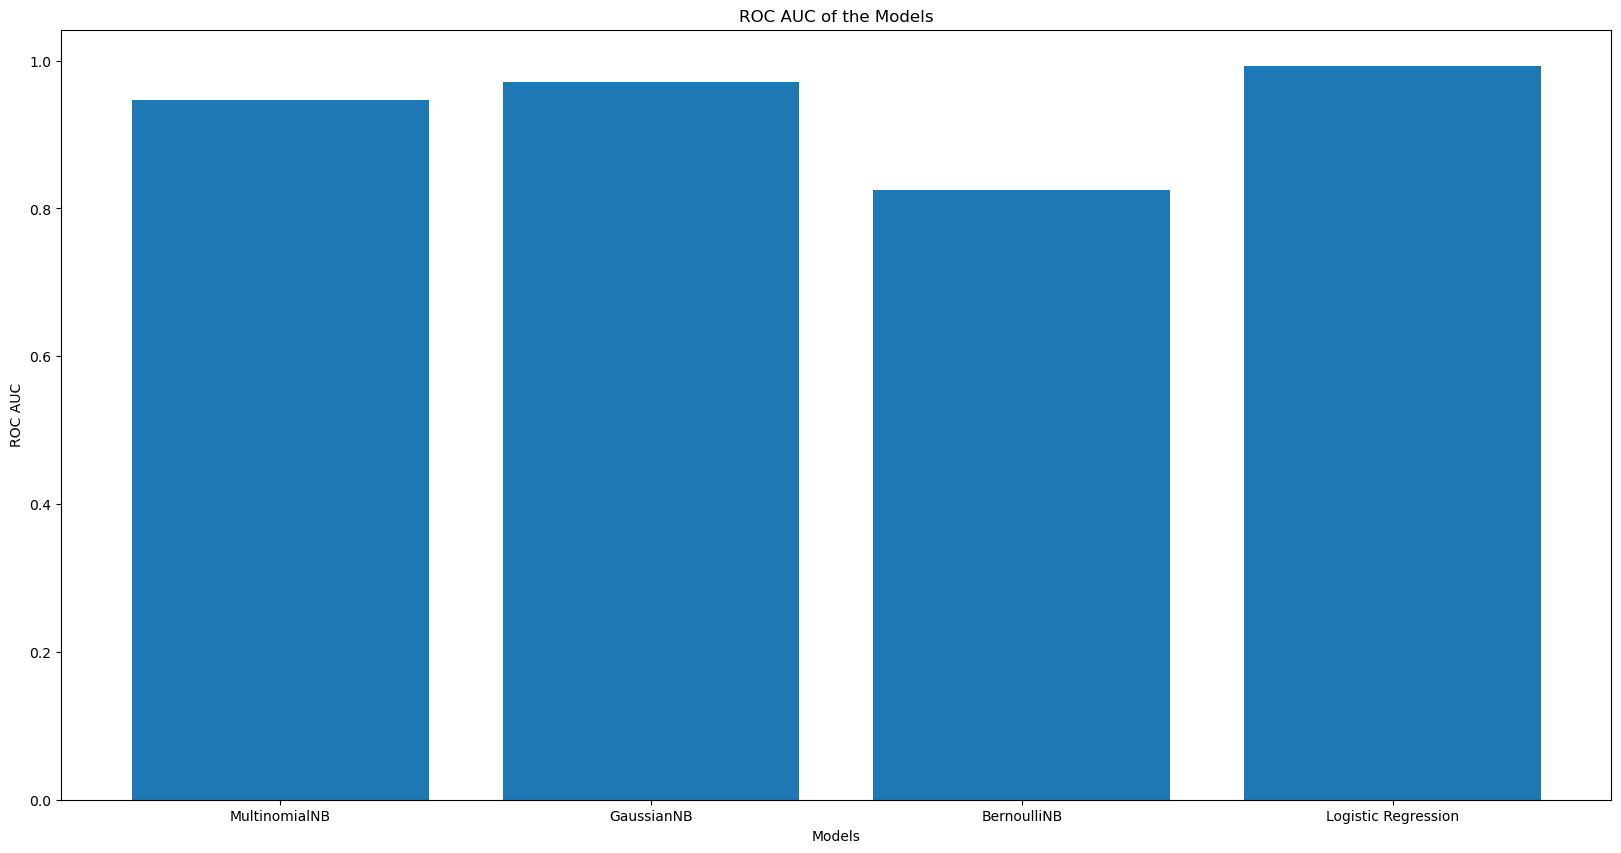

In [24]:
plt.figure(figsize = (20,10))
plt.bar(models, roc_auc)
plt.xlabel("Models")
plt.ylabel("ROC AUC")
plt.title("ROC AUC of the Models")
plt.show()

# 5. Conclusion

Based on the graphs above these are what I found:
* Logistic Regression gave the best results for all the metrics
    * Accuracy = 0.99
    * F1-Score = 0.99
    * Recall = 0.99
    * ROC AUC = 0.99
* From this I conclude that the Logistic Regression is the best algorithm for the given data as it has the best accuracy